<a href="https://colab.research.google.com/github/Nani143-ui/gen-Ai/blob/main/Copy_of_Gen_AI_lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 40.3 MB/s eta 0:00:00


In [ ]:
# 1) Load a Transformer-based T2I model (PixArt-a / DiT)

model_id = "PixArt-alpha/PixArt-XL-2-512x512"

import torch
from diffusers import PixArtAlphaPipeline

dtype = torch.float16 if torch.cuda.is_available() else torch.float32

pipe = PixArtAlphaPipeline.from_pretrained(
    model_id,
    torch_dtype=dtype,
)

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe.to(device)

# Optional: enable faster attention if available
if device == "cuda":
    pipe.enable_model_cpu_offload()
    # works well on limited VRAM
    pipe.enable_vae_slicing()

/usr/local/lib/python3.12/dist-packages/torch_xla/experimental/gru.py:113: SyntaxWarning: invalid escape sequence '\_'
  * **h_n**: tensor of shape :math:`(D * \text{num\_layers}, H_{out})` or
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

text_encoder/model-00003-of-00004.safete(…):   0%|          | 0.00/4.87G [00:00<?, ?B/s]

text_encoder/model-00001-of-00004.safete(…):   0%|          | 0.00/4.99G [00:00<?, ?B/s]

text_encoder/model-00002-of-00004.safete(…):   0%|          | 0.00/5.00G [00:00<?, ?B/s]

text_encoder/model-00004-of-00004.safete(…):   0%|          | 0.00/4.19G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer/spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

transformer/diffusion_pytorch_model.safe(…):   0%|          | 0.00/2.45G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Some weights of the model checkpoint at /root/.cache/huggingface/hub/models--PixArt-alpha--PixArt-XL-2-512x512/snapshots/50f702106901db6d0f8b67eb88e814c56ded2692/transformer were not used when initializing PixArtTransformer2DModel: 
 ['caption_projection.y_embedding']


In [ ]:
#2) Write a good prompt for a face

prompt = (
"Ultra-realistic close-up portrait of a young adult human, neutral expression,"
)

negative_prompt = (
"blurry, low quality, extra fingers, extra eyes, deformed, text, watermark, logo"
)

In [ ]:
#3) Generate the image

generator = torch.Generator(device=device).manual_seed(42) # set seed for reproducibility

image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=24, # increase for slightly higher quality
    guidance_scale=4.5, # 3.5-6 is typical
    height=512,
    width=512,
    generator=generator
).images[0]

#4) Save the result

image.save("face.png")

print("Saved to face.png")


Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...

Setting `clean_caption=True` requires the ftfy library but it was not found in your environment. Checkout the instructions on the
installation section: https://github.com/rspeer/python-ftfy/tree/master#installing and follow the ones
that match your environment. Please note that you may need to restart your runtime after installation.

Setting `clean_caption` to False...


  0%|          | 0/24 [00:00<?, ?it/s]

Saved to face.png


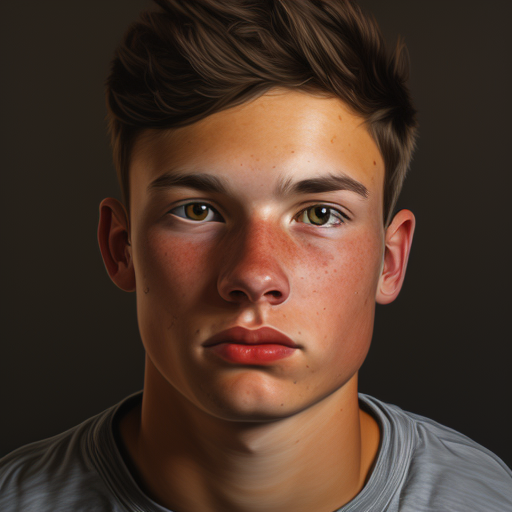

In [ ]:
from IPython.display import Image
display(Image(filename='face.png'))